In [1]:
import networkx as nx
import pandas as pd
from tqdm import tqdm

import pickle

C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# load graph object from file
G = pickle.load(open('final_multigraph_solved.pickle', 'rb'))

In [3]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 20391
Number of edges: 24596386


In [4]:
density = nx.density(G)
density

0.11831656298376066

In [5]:
ct = []
for u, v, attrs in G.edges(data=True):
    print(u,v,attrs)
    break

FRED ALGER MANAGEMENT INC_investor AAC HOLDINGS INC_stock {'quarter': '2015-06-30', 'changeCat': 'Buy', 'delay_cat': 'on time', 'volatility_category': nan, 'volume_category': nan, 'direction': 'stock_to_investor', 'investor_rank': 'large_investor', 'ticker': 'AACH', 'equityType': 'Domestic Common Stock', 'sicSector': 'Services', 'sicIndustry': 'Services-Specialty Outpatient Facilities Nec', 'ticker_classification': 'mid', 'edge_id': 'FRED ALGER MANAGEMENT INC_investorAAC HOLDINGS INC_stock2015-06-30'}


In [6]:
from networkx.algorithms import bipartite
print(bipartite.is_bipartite(G))

True


In [56]:
data_investor = sorted([item for item in sorted_centrality if item[0].endswith("_stock")], key=lambda x: x[1], reverse=True)

In [57]:
len(data_investor)

11555

In [34]:
centrality = nx.degree_centrality(G)


# Sort nodes by centrality
# sorted_nodes = sorted(centrality.items, key=centrality.get, reverse=True)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
a,b = zip(*sorted_centrality)

In [31]:
data_stock = sorted([item for item in sorted_centrality if item[0].endswith("_stock")], key=lambda x: x[1], reverse=True)[:10]

names_stock,values_stock = zip(*data_stock)
names_stock = [value.split('_')[0] for value in names_stock]

data_investor = sorted([item for item in sorted_centrality if item[0].endswith("_investor")], key=lambda x: x[1], reverse=True)[:10]
names_investor,values_investor = zip(*data_investor)
names_investor = [value.split('_')[0] for value in names_investor]


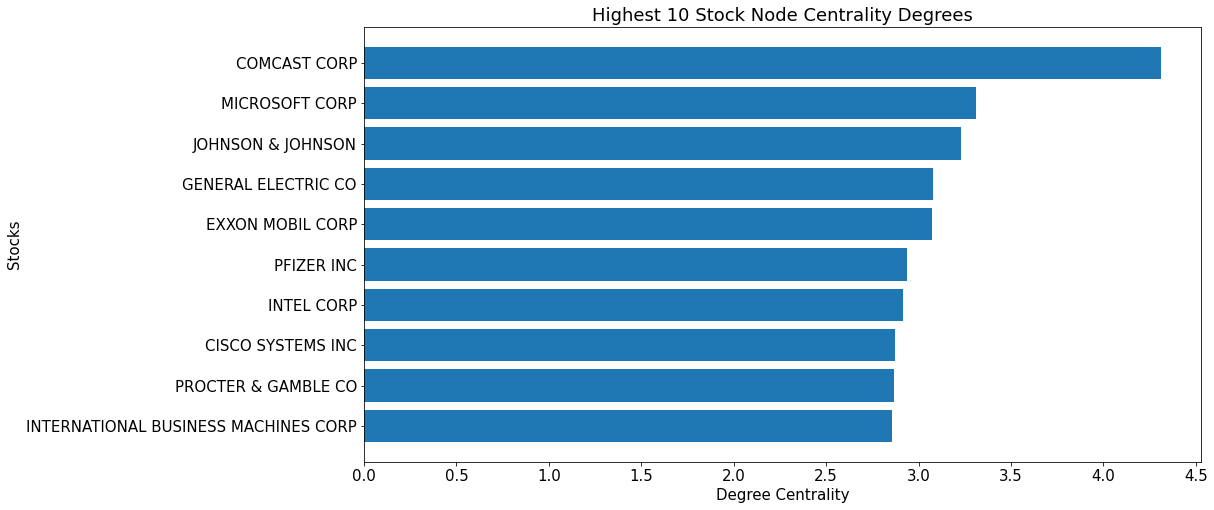

In [53]:
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 15}) 

plt.figure(figsize=(15, 8))
plt.barh(names_stock[::-1], values_stock[::-1])

plt.xlabel('Degree Centrality')
plt.ylabel('Stocks')
plt.title('Highest 10 Stock Node Centrality Degrees')
plt.xticks(np.arange(0, 5, step=0.5)) 
plt.show()


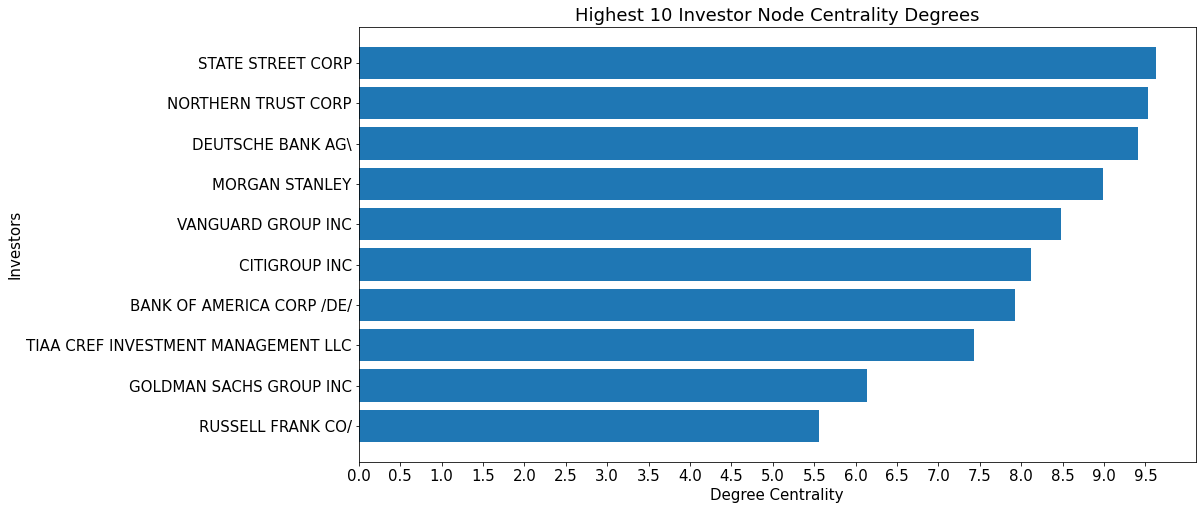

In [51]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15}) 

plt.figure(figsize=(15, 8))
plt.barh(names_investor[::-1], values_investor[::-1])

plt.xlabel('Degree Centrality')
plt.ylabel('Investors')
plt.title('Highest 10 Investor Node Centrality Degrees')
plt.xticks(np.arange(0, 10, step=0.5)) 
plt.show()

In [44]:
values_investor

(9.624963217263366,
 9.536047081902895,
 9.413339872486514,
 8.990583619421285,
 8.474889651790093,
 8.111868563021089,
 7.920549288867092,
 7.424080431584111,
 6.132368808239334,
 5.55885237861697)

# TAKE A LOOK AT THE PEAK

In [20]:
import networkx as nx
from datetime import datetime

def create_subset_graph(G, date_string):
    """
    Create a subset of a graph based on a specific date in the edge attribute 'timestamp'.
    
    Parameters:
    G (networkx.Graph): The original graph.
    date_string (str): The date to filter edges, formatted as 'YYYY-MM-DD'.
    
    Returns:
    networkx.Graph: A new graph containing all nodes from G and only the edges where 'timestamp' equals the specified date.
    """

    # Initialize a new graph of the same type as G
    G_subset = nx.Graph()

    # Add all nodes from G to G_subset
    G_subset.add_nodes_from(G.nodes(data=True))

    # Add edges with the specified timestamp to G_subset
    for u, v, attrs in G.edges(data=True):
        if 'quarter' in attrs and attrs['quarter'] == date_string:
            G_subset.add_edge(u, v, **attrs)

    return G_subset


In [8]:
peak_volatility_and_volume_graph = create_subset_graph(G, '2009-06-30')

In [9]:
print("Number of nodes:", peak_volatility_and_volume_graph.number_of_nodes())
print("Number of edges:", peak_volatility_and_volume_graph.number_of_edges())

Number of nodes: 20391
Number of edges: 333049


In [10]:
from networkx.algorithms import bipartite
print(bipartite.is_bipartite(peak_volatility_and_volume_graph))

True


In [16]:
import networkx as nx

# Create a bipartite graph (example)
# Add nodes and edges here...

# Function to calculate disparity measure of a graph
def calculate_disparity(G):
    disparity_scores = []
    for node in G.nodes():
        degree = G.degree(node)  # Total number of edges for node i
        if degree > 0:  # To avoid division by zero
            disparity = sum([(1 / degree)**2 for _ in range(degree)])
            disparity_scores.append(disparity)
    # Avoid division by zero if there are no nodes
    return sum(disparity_scores) / len(G.nodes()) if G.nodes() else 0

# Example usage
# disparity_measure = calculate_disparity(peak_volatility_and_volume_graph)
# print(disparity_measure)

# Calculate disparity measure for the graph
disparity_measure = calculate_disparity(peak_volatility_and_volume_graph)
print(disparity_measure)


0.031561731564843175


In [12]:
import networkx as nx

def get_central_subset(G, top_fraction=0.1):
    """
    Get the most central subset of a graph based on degree centrality.

    Parameters:
    G (networkx.Graph): The original graph.
    top_fraction (float): Fraction of top central nodes to include (0 < top_fraction <= 1).

    Returns:
    networkx.Graph: A subgraph of G containing the most central nodes.
    """
    # Calculate degree centrality for each node
    centrality = nx.degree_centrality(G)


    # Sort nodes by centrality
    sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)

    # Filter top 20 nodes with '_stock' suffix
    top_stock_nodes = [node for node in sorted_nodes if node.endswith('_stock')][:10]

    # Filter top 20 nodes with '_investor' suffix
    top_investor_nodes = [node for node in sorted_nodes if node.endswith('_investor')][:10]

    # Combine the two sets of nodes
    top_nodes = top_stock_nodes + top_investor_nodes

    # Create a subgraph with these top nodes
    subG = G.subgraph(top_nodes)

    return subG

# Example usage
G_central_subset = get_central_subset(G, top_fraction=0.001)

G_central_subset.number_of_nodes(), G_central_subset.number_of_edges()


(20, 7953)

In [13]:
nx.write_gexf(G_central_subset, "core_for_viz5.gexf")

# GET LIST OF TIMESTAMPED GRAPHS

In [21]:
quarters = []
for u, v, attrs in G.edges(data=True):
        quarters.append(attrs['quarter'])
        
quarters = set(quarters)
quarters = list(quarters)
len(quarters)

74

In [22]:
tuples= []
for date in tqdm(quarters):
    tuples.append((date, create_subset_graph(G, date)))
    break

  0%|                                                                                           | 0/74 [01:58<?, ?it/s]


In [30]:
ct = []
for idx,( u, v, attrs) in enumerate(tuples[0][1].edges(data=True)):
    print(u,v,attrs)
    if idx == 10:
        break

FRED ALGER MANAGEMENT INC_investor ACORDA THERAPEUTICS INC_stock {'quarter': '2012-09-30', 'changeCat': 'Large Buy', 'delay_cat': 'on time', 'volatility_category': 'very low', 'volume_category': 'high', 'direction': 'stock_to_investor', 'investor_rank': 'large_investor', 'ticker': 'ACOR', 'equityType': 'Domestic Common Stock', 'sicSector': 'Manufacturing', 'sicIndustry': 'Biological Products (No Disgnostic Substances)', 'ticker_classification': 'mid', 'edge_id': 'FRED ALGER MANAGEMENT INC_investorACORDA THERAPEUTICS INC_stock2012-09-30'}
FRED ALGER MANAGEMENT INC_investor ENERPAC TOOL GROUP CORP_stock {'quarter': '2012-09-30', 'changeCat': 'Large Sale', 'delay_cat': 'on time', 'volatility_category': nan, 'volume_category': nan, 'direction': 'investor_to_stock', 'investor_rank': 'large_investor', 'ticker': 'EPAC', 'equityType': 'Domestic Common Stock', 'sicSector': 'Manufacturing', 'sicIndustry': 'Misc Industrial & Commercial Machinery & Equipment', 'ticker_classification': 'mid', 'edge

In [ ]:
## 2SAAT SÜRÜYOR.